<a href="https://colab.research.google.com/github/aanhisbullah/RevoBank-Data-Analytics-with-Phyton/blob/main/RevoBank%20Data%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LIBRARY
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


###Read Data Dictionary

In [ ]:
url = "https://drive.google.com/file/d/1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe/view?usp=sharing"
output = "bank_promotion_analysis.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1l-sg91hd2ZLiFzGV2yZY8jJ3v-ksGPJe
To: /content/bank_promotion_analysis.csv
100%|██████████| 16.5M/16.5M [00:00<00:00, 67.5MB/s]


'bank_promotion_analysis.csv'

In [ ]:
df = pd.read_csv("/content/bank_promotion_analysis.csv")
df.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

##Data Cleaning
1. Cek type tiap kolom Convert register_date data types to datetime
2. Cek Missing Value
3. Cek Duplicated data
4. Copy Dataframe untuk memilih Merchant Name Revoshop
5. Mencari sensitive promo pada tiap customer

In [ ]:
# Convert data type from data frame

# df['ACCOUNT_ID'] = df['ACCOUNT_ID'].astype(str)
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'])

df['BIRTH_DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 112634 entries, 0 to 112633
Series name: BIRTH_DATE
Non-Null Count   Dtype         
--------------   -----         
112634 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 880.1 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             112634 non-null  int64         
 1   MCC                    112634 non-null  object        
 2   MERCHANT_NAME          112634 non-null  object        
 3   AVG_TXN_AMT_L6M        112634 non-null  float64       
 4   AVG_TXN_AMT_LTM        112634 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64       
 7   TXN_CNT_L6M            112634 non-null  float64       
 8   TXN_CNT_LTM            112634 non-null  float64       
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64       
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64       
 11  LAST_TXN_DAY           112634 non-null  float64       
 12  CNT_PROMO_L6M          112634 non-null  floa

In [ ]:
# to check missing values
df.isna().sum()

ACCOUNT_ID               0
MCC                      0
MERCHANT_NAME            0
AVG_TXN_AMT_L6M          0
AVG_TXN_AMT_LTM          0
AVG_PROMO_TXN_AMT_L6M    0
AVG_PROMO_TXN_AMT_LTM    0
TXN_CNT_L6M              0
TXN_CNT_LTM              0
PROMO_TXN_CNT_L6M        0
PROMO_TXN_CNT_LTM        0
LAST_TXN_DAY             0
CNT_PROMO_L6M            0
CNT_PROMO_L12M           0
CUST_VALUE_GROUP         0
MAPP_ACTIVE_GROUP        0
HOMEOWNER_STATUS         0
HOME_VALUE               0
PROXY_INCOME             0
PCT_INCOME_RETIREMENT    0
MOB                      0
FLAG_FEMALE              0
PROMO_CHANNEL            0
BIRTH_DATE               0
dtype: int64

In [ ]:
# to check duplicated data
df.duplicated().sum()

0

In [ ]:
df.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


###Merchant Revoshop

In [ ]:
# to see each MERCHANT name and its counts
df['MERCHANT_NAME'] = df['MERCHANT_NAME'].replace('REVOSH MKTPLC', 'REVOSHOP')
df['MERCHANT_NAME'].value_counts()

REVOSHOP           111133
TOKTOKLIVE           1500
EL CORTE INGLES         1
Name: MERCHANT_NAME, dtype: int64

In [ ]:
# Copy the Data frame to only include rows with MERCHANT_NAME 'REVOSHOP'
df2 = df.copy()

# Drop the data frame to only include rows with MERCHANT_NAME 'REVOSHOP'
df2.drop(df2[df2['MERCHANT_NAME'] != 'REVOSHOP'].index, inplace=True)

df2.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


In [ ]:
df2['MCC'].value_counts()

5262-MARKETPLACES    111133
Name: MCC, dtype: int64

In [ ]:
df2['AVG_PROMO_TXN_AMT_L6M'] = df2['AVG_PROMO_TXN_AMT_L6M'].replace(-1, 0)
df2['AVG_PROMO_TXN_AMT_L6M'].describe()

count    111133.000000
mean        121.767570
std          82.075251
min           0.000000
25%          75.000000
50%         100.000000
75%         150.000000
max        2000.000000
Name: AVG_PROMO_TXN_AMT_L6M, dtype: float64

In [ ]:
df2['MERCHANT_NAME'].value_counts()

REVOSHOP    111133
Name: MERCHANT_NAME, dtype: int64

###Find Promo Sensitive
Customer dianggap peka terhadap promo jika lebih dari 50% dari total penjualan mereka di revoshop dikaitkan dengan promo

In [ ]:
# find promo sensitive
df2['PCT_PROMO_SALES'] = df2['AVG_PROMO_TXN_AMT_LTM'] / df2['AVG_TXN_AMT_LTM'] * 100
df2['PROMO_SENSITIVE'] = df2['PCT_PROMO_SALES'] > 50
df2['PROMO_SENSITIVE'].value_counts()

True     109306
False      1827
Name: PROMO_SENSITIVE, dtype: int64

In [ ]:
df2.duplicated().value_counts()

False    111133
dtype: int64

In [ ]:
df2.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,PCT_PROMO_SALES,PROMO_SENSITIVE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17,124.378109,True
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27,131.463628,True
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22,119.489081,True
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26,142.857143,True
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21,116.129032,True


In [ ]:
df2['PROMO_SENSITIVE'] = df2['PROMO_SENSITIVE'].astype(int)
df2['PROMO_SENSITIVE'].value_counts()

1    109306
0      1827
Name: PROMO_SENSITIVE, dtype: int64

###Insight into the promo Performance in the past 6 months
a. How many RevoShop customers

b. What are the customer demographics in the dataset

c. How much total sales have been generated in RevoShop over the past 6 months?

d. How many sales were made in response to the promo in the last 6 months?

e. What percentage of total sales at RevoShop is attributed to the promo?

f. What is the average number of transactions per customer in their lifetime and over the past 6 months?

g. What is the total cost of the promotion over the past 6 months?

h. What is the total revenue generated by the promo in the past 6 months?

i. How many customers are considered promo-sensitive?


In [ ]:
#Total RevoShop customers
num_customer = len(df2['ACCOUNT_ID'].unique())
print(num_customer)

111133


In [ ]:
# Calculate age based on the current date
current_date = datetime.now()
df2['AGE'] = (current_date - df2['BIRTH_DATE']).astype('<m8[Y]')

# Analyze age distribution
pd.DataFrame(df2['AGE'].describe())

,AGE
count,111133.000000
mean,40.512062
std,5.680797
min,17.000000
25%,37.000000
50%,40.000000
75%,44.000000
max,67.000000


In [ ]:
df2.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE,PCT_PROMO_SALES,PROMO_SENSITIVE,AGE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17,124.378109,1,47.0
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27,131.463628,1,31.0
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22,119.489081,1,53.0
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26,142.857143,1,39.0
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21,116.129032,1,33.0


In [ ]:
gender_distribution = df2['FLAG_FEMALE'].value_counts(normalize=True) * 100
gender_distribution_labels = {1.0: 'Female', 0.0: 'Male'}
for value, count in gender_distribution.items():
    label = gender_distribution_labels.get(value)
    print(f"{label}: {count}")

Female: 58.48487847893965
Male: 41.51512152106035


In [ ]:
df2['MOB'].describe()

count    111133.000000
mean        101.489432
std          25.559089
min          21.000000
25%          81.000000
50%         105.000000
75%         125.000000
max         570.000000
Name: MOB, dtype: float64

In [ ]:
#Total Sales over the past 6 months
total_sales = df2['AVG_TXN_AMT_L6M'] * df2['TXN_CNT_L6M']
total_sales_amount = total_sales.sum()
print(round(total_sales_amount))

58077849


In [ ]:
#Number of sales made in response to the promo in the last 6 months
promo_sales_count = df2['PROMO_TXN_CNT_L6M'].sum()
print(promo_sales_count)

307570.0


In [ ]:
#Percentage of total sales attributed to the promo in the past 6 months
promo_sales_percentage = (promo_sales_count / total_sales_amount) * 100
print(promo_sales_percentage)

0.5295822862337451


In [ ]:
#Total Sales over the lifetime
total_sales_ltm = df2['AVG_TXN_AMT_LTM'] * df2['TXN_CNT_LTM']
total_sales_amount_ltm = total_sales_ltm.sum()
promo_sales_count_ltm = df2['PROMO_TXN_CNT_LTM'].sum()

#Percentage of total sales attributed to the promo in the lifetime
promo_sales_percentage_ltm = (promo_sales_count_ltm / total_sales_amount_ltm) * 100

print("Percentage in the past 6 months: ", round(promo_sales_percentage, 2))
print("Percentage in the lifetime     : ", round(promo_sales_percentage_ltm, 2))

Percentage in the past 6 months:  0.53
Percentage in the lifetime     :  0.5


In [ ]:
#Average number of transactions per customer
avg_trans_ltm = df2['TXN_CNT_LTM'].sum() / num_customer
avg_trans_l6m = df2['TXN_CNT_L6M'].sum() / num_customer

print("Average number of transactions per customer in the Lifetime            :", round(avg_trans_ltm,2))
print("Average number of transactions per customer in over the past 6 months  :", round(avg_trans_l6m,2))

Average number of transactions per customer in the Lifetime            : 20.09
Average number of transactions per customer in over the past 6 months  : 4.47


In [ ]:
#The total cost of the promotion over the past 6 months
promo_cost = df2['PROMO_TXN_CNT_L6M'].sum() * 1.5
print(promo_cost)

461355.0


In [ ]:
#the total revenue generated by the promo in the past 6 months
promo_revenue = total_sales_amount * 0.024
print(promo_revenue)

1393868.3736


In [ ]:
#Customers are considered promo-sensitive
promo_sensitive_counts = df2['PROMO_SENSITIVE'].value_counts()
promo_sensitive_labels = {1: 'Total Customer Promo-Sensitive', 0: 'Total Customer No Promo-Sensitive'}
for value, count in promo_sensitive_counts.items():
    label = promo_sensitive_labels.get(value)
    print(f"{label}: {count}")

Total Customer Promo-Sensitive: 109306
Total Customer No Promo-Sensitive: 1827


In [ ]:
df2['PROMO_SENSITIVE'].value_counts()

1    109306
0      1827
Name: PROMO_SENSITIVE, dtype: int64

##Exploratory Data Analysis
a. Is there any difference in transaction behavior and promo sensitivity between active and inactive customers in the past 6 months?

b. Is there any difference in transaction behavior and promo sensitivity between high-value and lower-value customers in the past 6 months?

c. Is there a relationship between increasing the number of email and SMS messages and improved sales performance?

###Promo sensitivity between active and inactive

In [ ]:
# Mengganti nilai-nilai 'MAPP_ACTIVE_GROUP'
df2['MAPP_ACTIVE_GROUP'] = df2['MAPP_ACTIVE_GROUP'].replace({'X': 'Active', 'Y': 'Average', 'Z': 'Inactive'})
df2['MAPP_ACTIVE_GROUP'].value_counts()

Active      103348
Average       7301
Inactive       484
Name: MAPP_ACTIVE_GROUP, dtype: int64

In [ ]:
df2['TXN_AMT_L6M'] = df2['AVG_TXN_AMT_L6M'] * df2['TXN_CNT_L6M']
df2['TXN_AMT_L6M'].head()

0    1080.0
1     429.9
2    1053.2
3    1884.8
4     490.0
Name: TXN_AMT_L6M, dtype: float64

In [ ]:
# Difference in transaction behavior and promo sensitivity between active and inactive customers in the past 6 months
df_l6m = df2.groupby(['MAPP_ACTIVE_GROUP','PROMO_SENSITIVE']).agg({
    'TXN_AMT_L6M': 'mean',
    'TXN_CNT_L6M': 'mean'
})
df_l6m.columns = ['Average_Trans_Amount', 'Average_Trans_Count']


df_l6m = df_l6m.reset_index()

df_l6m

,MAPP_ACTIVE_GROUP,PROMO_SENSITIVE,Average_Trans_Amount,Average_Trans_Count
0,Active,0,502.591880,3.629426
1,Active,1,523.926626,4.502183
2,Average,0,489.080000,3.592308
3,Average,1,499.992344,4.208757
4,Inactive,0,317.832203,3.033898
5,Inactive,1,701.761647,5.482353


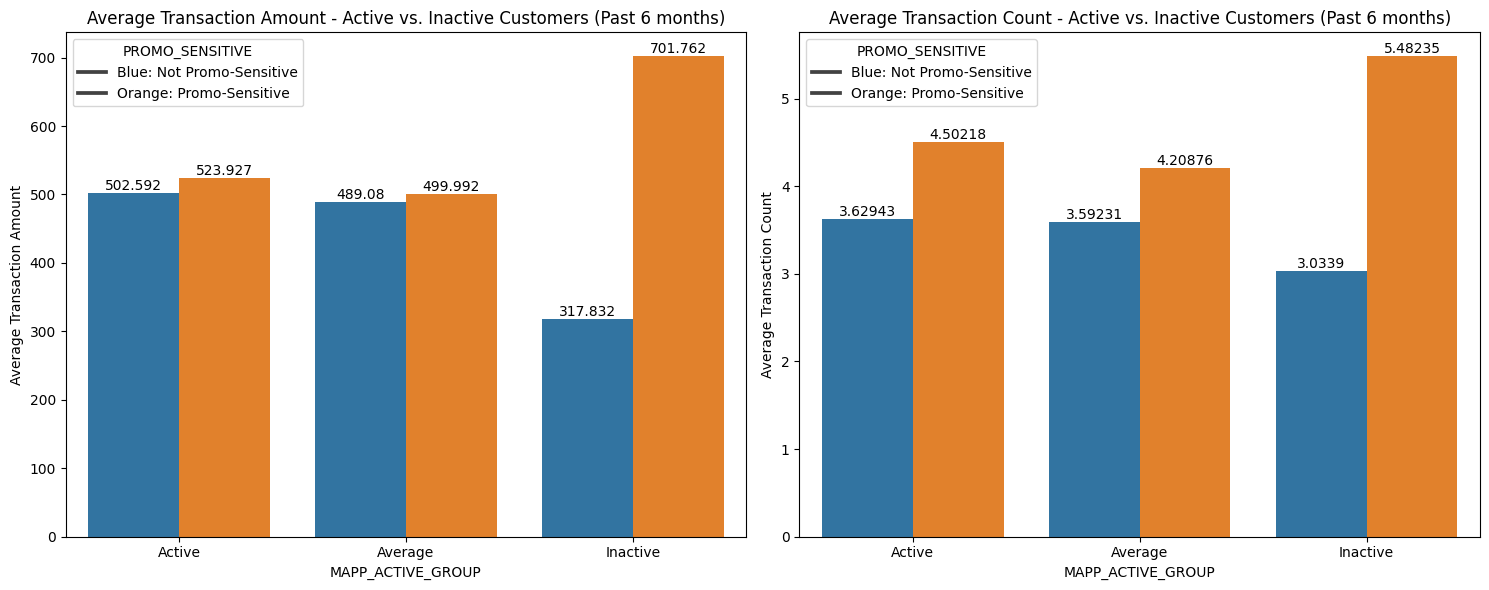

In [ ]:
plt.figure(figsize=(15, 6))

# First subplot - Average Transaction Amount
ax = plt.subplot(1, 2, 1)
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Average_Trans_Amount', hue='PROMO_SENSITIVE', data=df_l6m)
plt.title('Average Transaction Amount - Active vs. Inactive Customers (Past 6 months)')
plt.xlabel('MAPP_ACTIVE_GROUP')
plt.ylabel('Average Transaction Amount')
plt.legend(title='PROMO_SENSITIVE', loc='upper left', labels=['Blue: Not Promo-Sensitive', 'Orange: Promo-Sensitive'])
# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

# Second subplot - Average Transaction Count
axs = plt.subplot(1, 2, 2)
sns.barplot(x='MAPP_ACTIVE_GROUP', y='Average_Trans_Count', hue='PROMO_SENSITIVE', data=df_l6m)
plt.title('Average Transaction Count - Active vs. Inactive Customers (Past 6 months)')
plt.xlabel('MAPP_ACTIVE_GROUP')
plt.ylabel('Average Transaction Count')
plt.legend(title='PROMO_SENSITIVE', loc='upper left', labels=['Blue: Not Promo-Sensitive', 'Orange: Promo-Sensitive'])
# Add labels to histogram bars
for i in axs.containers:
    axs.bar_label(i)

plt.tight_layout()
plt.show()

In [ ]:
# Difference in transaction behavior between active and inactive customers in the past 6 months
behavior_l6m = df2.groupby(['MAPP_ACTIVE_GROUP']).agg({
    'ACCOUNT_ID': 'nunique',
    'PROMO_SENSITIVE': 'sum',
    'TXN_AMT_L6M': 'mean',
    'TXN_CNT_L6M': 'mean'
})
behavior_l6m.columns = ['Total_Customers', 'Promo-Sensitive_Customers', 'Average_Transaction_Amount', 'Average_Transaction_Count']


behavior_l6m

,Total_Customers,Promo-Sensitive_Customers,Average_Transaction_Amount,Average_Transaction_Count
MAPP_ACTIVE_GROUP,,,,
Active,103348,101710,523.588484,4.488350
Average,7301,7171,499.798041,4.197781
Inactive,484,425,654.960331,5.183884


(array([0, 1, 2]),
 [Text(0, 0, 'Active'), Text(1, 0, 'Average'), Text(2, 0, 'Inactive')])

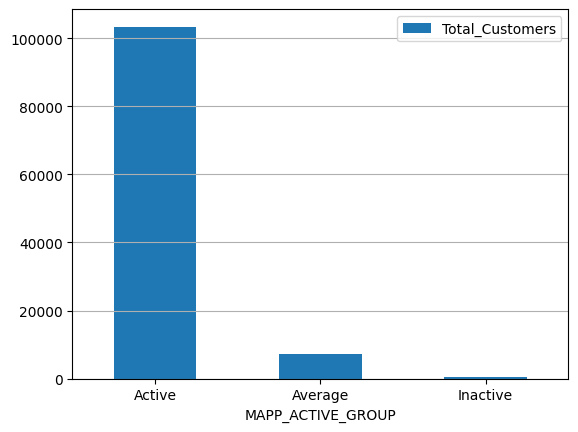

In [ ]:
# Transaction behaviour of one client
behavior_l6m[['Total_Customers']].plot(kind='bar', grid=True)
plt.grid(axis='x')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Active'), Text(1, 0, 'Average'), Text(2, 0, 'Inactive')])

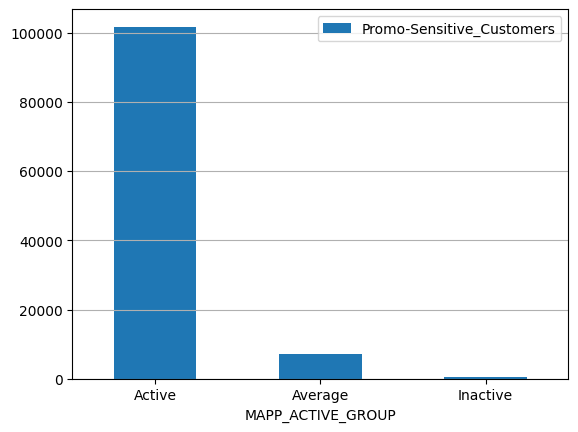

In [ ]:
behavior_l6m[['Promo-Sensitive_Customers']].plot(kind='bar', grid=True)
plt.grid(axis='x')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Active'), Text(1, 0, 'Average'), Text(2, 0, 'Inactive')])

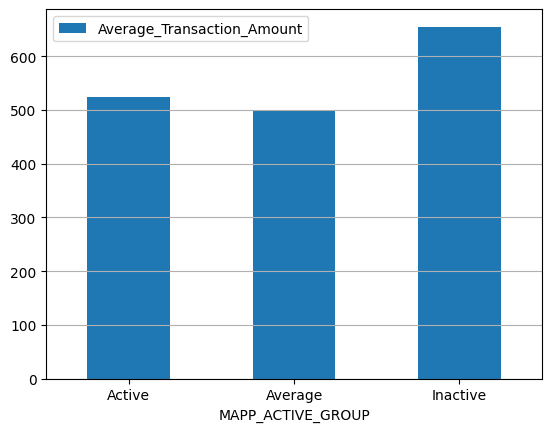

In [ ]:
behavior_l6m[['Average_Transaction_Amount']].plot(kind='bar', grid=True)
plt.grid(axis='x')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Active'), Text(1, 0, 'Average'), Text(2, 0, 'Inactive')])

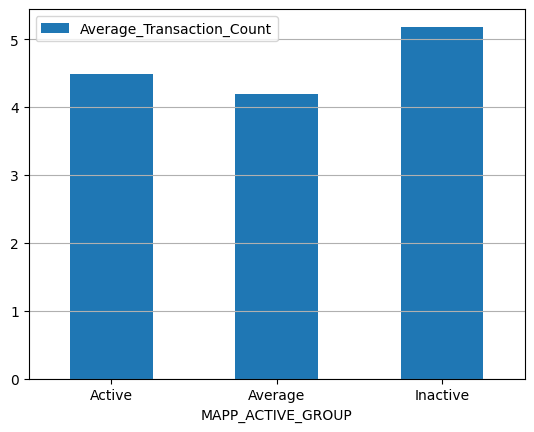

In [ ]:
behavior_l6m[['Average_Transaction_Count']].plot(kind='bar', grid=True)
plt.grid(axis='x')
plt.xticks(rotation=0)

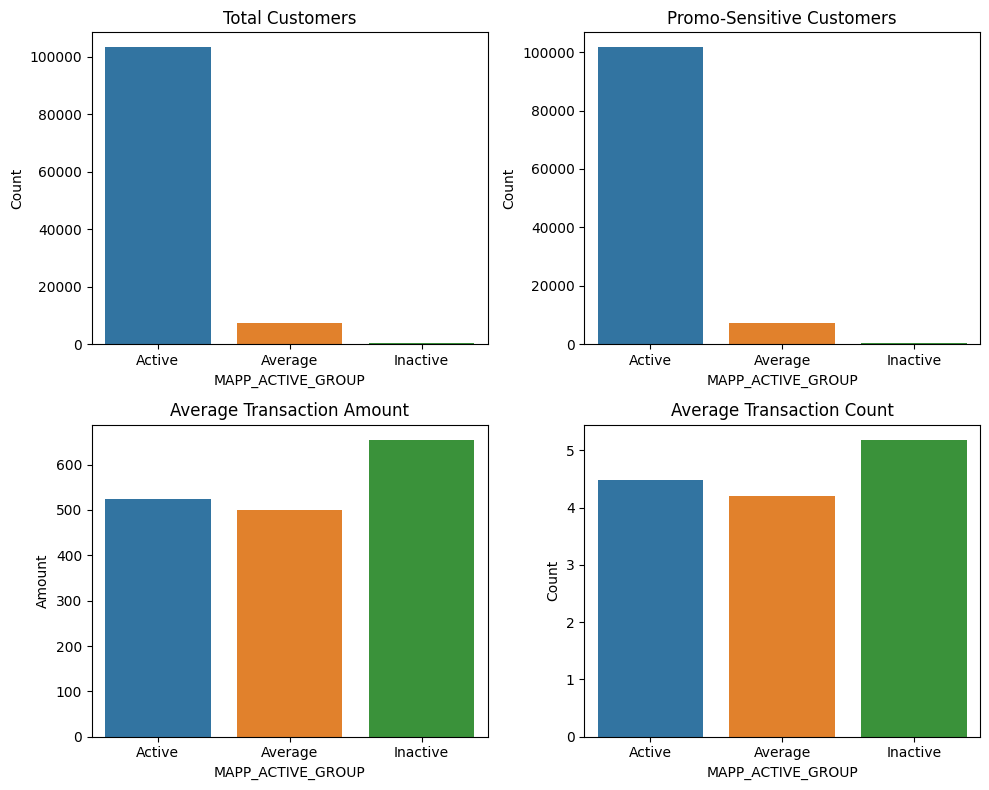

In [ ]:
# Bar plots to compare the metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.barplot(x=behavior_l6m.index, y=behavior_l6m['Total_Customers'], ax=axes[0, 0])
axes[0, 0].set_title('Total Customers')
axes[0, 0].set_xlabel('MAPP_ACTIVE_GROUP')
axes[0, 0].set_ylabel('Count')

sns.barplot(x=behavior_l6m.index, y=behavior_l6m['Promo-Sensitive_Customers'], ax=axes[0, 1])
axes[0, 1].set_title('Promo-Sensitive Customers')
axes[0, 1].set_xlabel('MAPP_ACTIVE_GROUP')
axes[0, 1].set_ylabel('Count')

sns.barplot(x=behavior_l6m.index, y=behavior_l6m['Average_Transaction_Amount'], ax=axes[1, 0])
axes[1, 0].set_title('Average Transaction Amount')
axes[1, 0].set_xlabel('MAPP_ACTIVE_GROUP')
axes[1, 0].set_ylabel('Amount')

sns.barplot(x=behavior_l6m.index, y=behavior_l6m['Average_Transaction_Count'], ax=axes[1, 1])
axes[1, 1].set_title('Average Transaction Count')
axes[1, 1].set_xlabel('MAPP_ACTIVE_GROUP')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

###Promo sensitivity between high-value and lower-value

In [ ]:
# Mengganti nilai-nilai 'MAPP_ACTIVE_GROUP'
df2['CUST_VALUE_GROUP'] = df2['CUST_VALUE_GROUP'].replace({
    'A': 'A: Best', 'B': 'B: Good', 'C': 'C: Average', 'D': 'D: Low', 'E': 'E: Worst'})
df2['CUST_VALUE_GROUP'].value_counts()

E: Worst      45958
C: Average    18233
B: Good       17619
A: Best       16878
D: Low        12445
Name: CUST_VALUE_GROUP, dtype: int64

In [ ]:
# Group the data by CUST_VALUE_GROUP
grouped_value = df2.groupby('CUST_VALUE_GROUP').agg({
    'ACCOUNT_ID': 'nunique',
    'PROMO_SENSITIVE': 'sum',
    'TXN_AMT_L6M': 'mean',
    'TXN_CNT_L6M': 'mean'
})
grouped_value.columns = ['Total_Customers', 'Promo-Sensitive_Customers', 'Average_Transaction_Amount', 'Average_Transaction_Count']

# Reset the index
grouped_value = grouped_value.reset_index()

grouped_value


,CUST_VALUE_GROUP,Total_Customers,Promo-Sensitive_Customers,Average_Transaction_Amount,Average_Transaction_Count
0,A: Best,16878,16551,554.724505,4.182782
1,B: Good,17619,17301,522.040655,4.300471
2,C: Average,18233,17887,522.117068,4.486700
3,D: Low,12445,12207,528.192696,4.530655
4,E: Worst,45958,45360,509.688320,4.622960


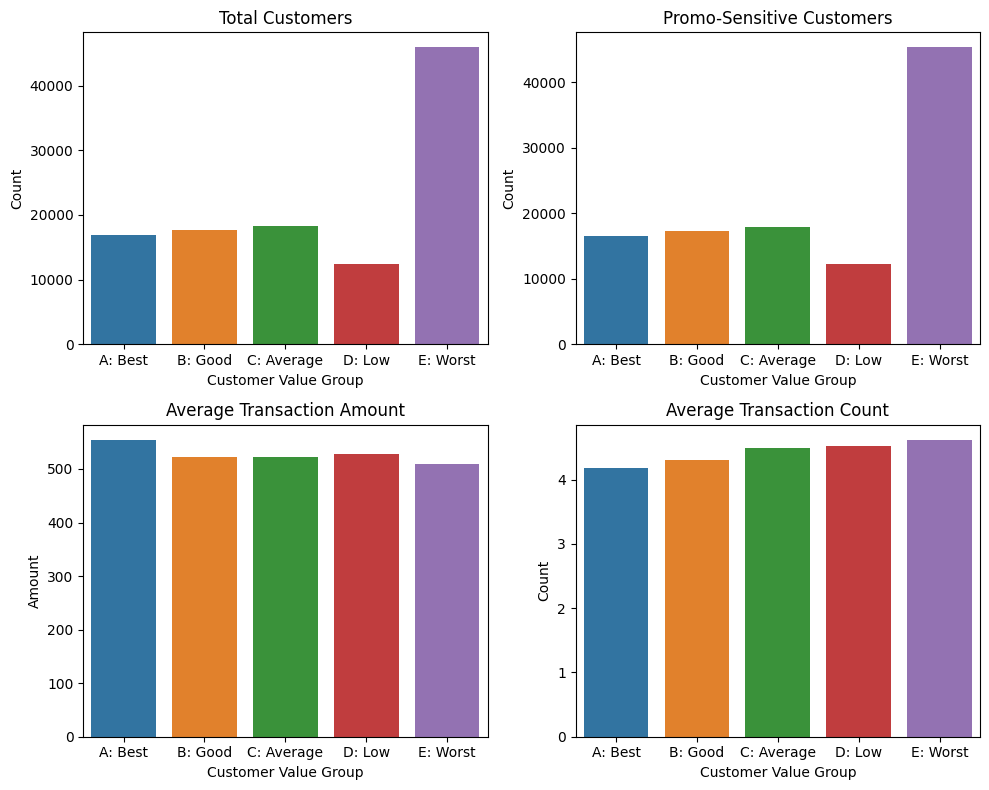

In [ ]:
# Bar plots to compare the metrics between high-value and lower-value customers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.barplot(x='CUST_VALUE_GROUP', y='Total_Customers', data=grouped_value, ax=axes[0, 0])
axes[0, 0].set_title('Total Customers')
axes[0, 0].set_xlabel('Customer Value Group')
axes[0, 0].set_ylabel('Count')

sns.barplot(x='CUST_VALUE_GROUP', y='Promo-Sensitive_Customers', data=grouped_value, ax=axes[0, 1])
axes[0, 1].set_title('Promo-Sensitive Customers')
axes[0, 1].set_xlabel('Customer Value Group')
axes[0, 1].set_ylabel('Count')

sns.barplot(x='CUST_VALUE_GROUP', y='Average_Transaction_Amount', data=grouped_value, ax=axes[1, 0])
axes[1, 0].set_title('Average Transaction Amount')
axes[1, 0].set_xlabel('Customer Value Group')
axes[1, 0].set_ylabel('Amount')

sns.barplot(x='CUST_VALUE_GROUP', y='Average_Transaction_Count', data=grouped_value, ax=axes[1, 1])
axes[1, 1].set_title('Average Transaction Count')
axes[1, 1].set_xlabel('Customer Value Group')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Group the data by CUST_VALUE_GROUP & PROMO_SENSITIVE
group_value = df2.groupby(['CUST_VALUE_GROUP','PROMO_SENSITIVE']).agg({
    'ACCOUNT_ID': 'nunique',
    'TXN_AMT_L6M': 'mean',
    'TXN_CNT_L6M': 'mean'
})
group_value.columns = [ 'Total_Customer', 'Average_Transaction_Amount', 'Average_Transaction_Count']

group_value = group_value.reset_index()

group_value

,CUST_VALUE_GROUP,PROMO_SENSITIVE,Total_Customer,Average_Transaction_Amount,Average_Transaction_Count
0,A: Best,0,327,499.666667,3.048930
1,A: Best,1,16551,555.812289,4.205184
2,B: Good,0,318,509.352830,3.383648
3,B: Good,1,17301,522.273863,4.317323
4,C: Average,0,346,492.657514,3.959538
5,C: Average,1,17887,522.686923,4.496897
6,D: Low,0,238,563.119328,4.033613
7,D: Low,1,12207,527.511731,4.540346
8,E: Worst,0,598,461.088462,3.658863
9,E: Worst,1,45360,510.329032,4.635670


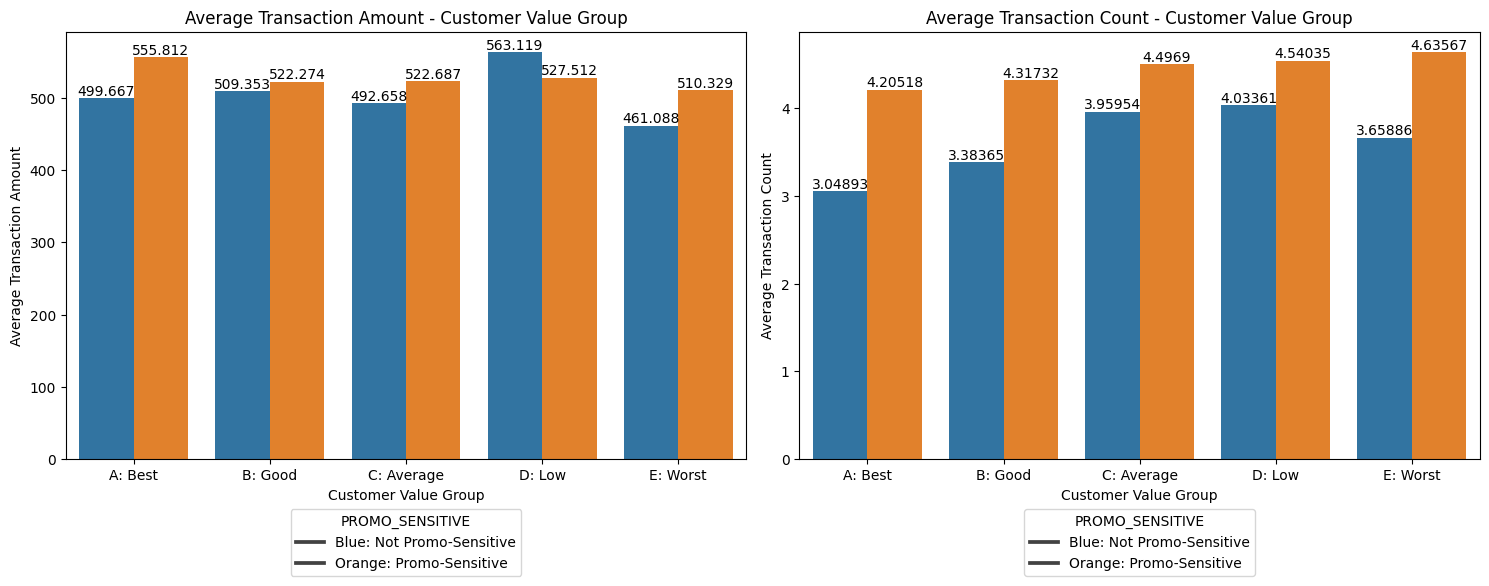

In [ ]:
plt.figure(figsize=(15, 6))

# First subplot - Average Transaction Amount
a = plt.subplot(1, 2, 1)
sns.barplot(x='CUST_VALUE_GROUP', y='Average_Transaction_Amount', hue='PROMO_SENSITIVE', data=group_value)
plt.title('Average Transaction Amount - Customer Value Group')
plt.xlabel('Customer Value Group')
plt.ylabel('Average Transaction Amount')
plt.legend(title='PROMO_SENSITIVE', loc='upper center', bbox_to_anchor=(0.5, -0.1), labels=['Blue: Not Promo-Sensitive', 'Orange: Promo-Sensitive'])

# Add labels to histogram bars
for i in a.containers:
    a.bar_label(i)

# Second subplot - Average Transaction Count
x = plt.subplot(1, 2, 2)
sns.barplot(x='CUST_VALUE_GROUP', y='Average_Transaction_Count', hue='PROMO_SENSITIVE', data=group_value)
plt.title('Average Transaction Count - Customer Value Group')
plt.xlabel('Customer Value Group')
plt.ylabel('Average Transaction Count')
plt.legend(title='PROMO_SENSITIVE', loc='upper center', bbox_to_anchor=(0.5, -0.1), labels=['Blue: Not Promo-Sensitive', 'Orange: Promo-Sensitive'])

# Add labels to histogram bars
for i in x.containers:
    x.bar_label(i)

plt.tight_layout()
plt.show()

### Relationship between increasing the number of email and SMS messages and improved sales performance

In [ ]:
# Group the data by CNT_PROMO_L6M (Number of e-mail/SMS about promo received)
grouped_promo_count = df2.groupby('CNT_PROMO_L6M').agg({
    'AVG_TXN_AMT_L6M': 'sum',
    'ACCOUNT_ID': 'nunique'
})

# Calculate the average sales per customer for each promo communication count group
average_sales_per_customer = grouped_promo_count['AVG_TXN_AMT_L6M'] / grouped_promo_count['ACCOUNT_ID']
average_sales_per_customer

CNT_PROMO_L6M
0.0      89.992857
1.0     114.089968
2.0     113.363184
3.0     102.902955
4.0     109.619288
5.0     112.202368
6.0     133.232613
7.0     142.404606
8.0     170.009118
9.0     163.443740
10.0    140.159365
11.0    147.699288
12.0    147.004082
13.0    162.424561
14.0    158.344444
15.0    104.275000
16.0    116.380769
17.0    102.578571
18.0     96.700000
19.0     71.060000
20.0     57.300000
21.0    103.100000
dtype: float64

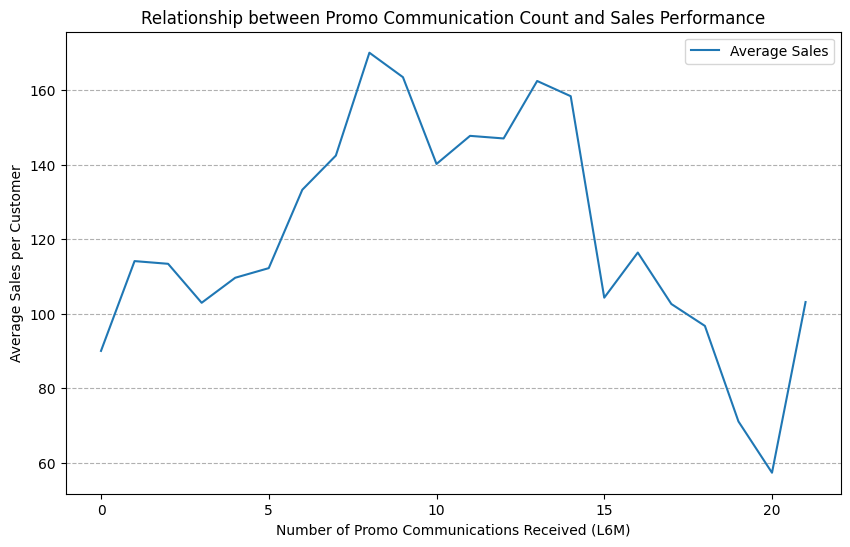

In [ ]:
# Visualize the relationship between promo communication count and average sales per customer
plt.figure(figsize=(10, 6))
#sns.barplot(x=average_sales_per_customer.index, y=average_sales_per_customer.values)
sns.lineplot(x=average_sales_per_customer.index, y=average_sales_per_customer.values)
#plt.bar(average_sales_per_customer.index, average_sales_per_customer.values) bar
plt.xlabel('Number of Promo Communications Received (L6M)')
plt.ylabel('Average Sales per Customer')
plt.title('Relationship between Promo Communication Count and Sales Performance')
plt.grid(axis='y', linestyle='--')
plt.legend(['Average Sales'])

plt.show()

##Segmentation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###Data Pre-Processing

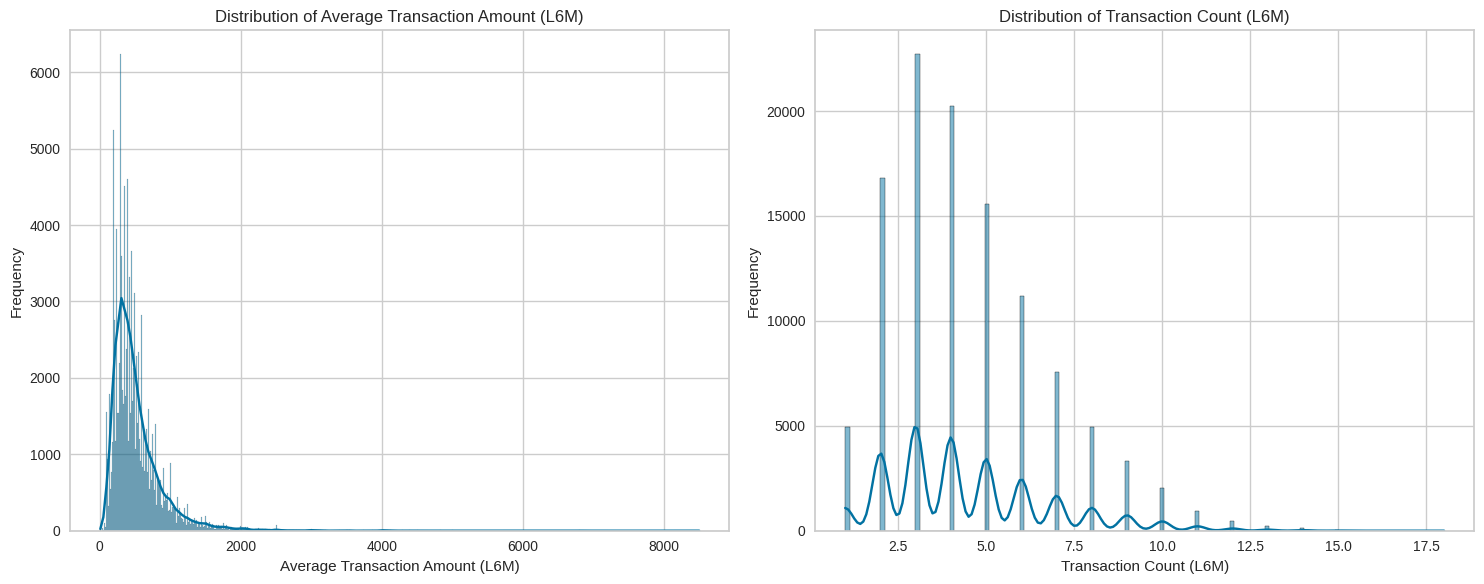

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['TXN_AMT_L6M'], kde=True)
plt.xlabel('Transaction Amount (L6M)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount (L6M)')

plt.subplot(1, 2, 2)
sns.histplot(df2['TXN_CNT_L6M'], kde=True)
plt.xlabel('Transaction Count (L6M)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Count (L6M)')
plt.tight_layout()
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111133 entries, 0 to 112632
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             111133 non-null  int64         
 1   MCC                    111133 non-null  object        
 2   MERCHANT_NAME          111133 non-null  object        
 3   AVG_TXN_AMT_L6M        111133 non-null  float64       
 4   AVG_TXN_AMT_LTM        111133 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  111133 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  111133 non-null  float64       
 7   TXN_CNT_L6M            111133 non-null  float64       
 8   TXN_CNT_LTM            111133 non-null  float64       
 9   PROMO_TXN_CNT_L6M      111133 non-null  float64       
 10  PROMO_TXN_CNT_LTM      111133 non-null  float64       
 11  LAST_TXN_DAY           111133 non-null  float64       
 12  CNT_PROMO_L6M          111133 non-null  floa

In [ ]:
# We Group the data to see unique user characteristics
customer = df2.groupby('ACCOUNT_ID').agg({
    'TXN_CNT_L6M': 'sum',
    'TXN_AMT_L6M': 'sum',
}).reset_index()

customer.head()

,ACCOUNT_ID,TXN_CNT_L6M,TXN_AMT_L6M
0,100000004,5.0,1080.0
1,100000008,3.0,429.9
2,100000012,4.0,1053.2
3,100000014,8.0,1884.8
4,100000015,5.0,490.0


###Detect Outlier

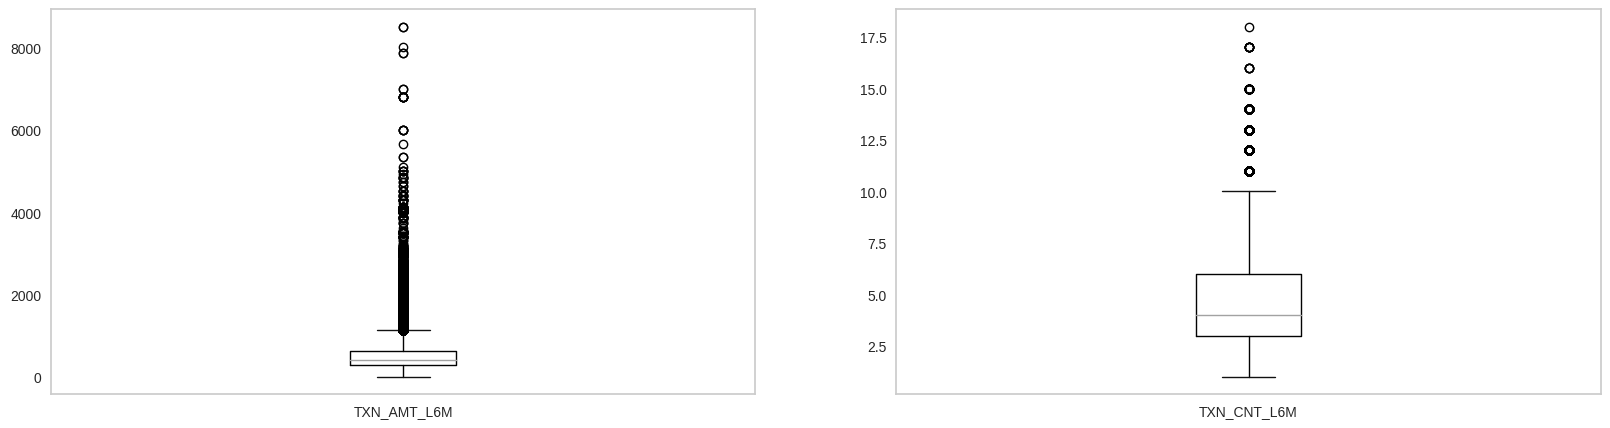

In [ ]:
# filter numeric column
col_list = ['TXN_AMT_L6M','TXN_CNT_L6M']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = df2.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111133 entries, 0 to 111132
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ACCOUNT_ID   111133 non-null  int64  
 1   TXN_CNT_L6M  111133 non-null  float64
 2   TXN_AMT_L6M  111133 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


###Check Data Distribution

Text(0, 0.5, 'Transaction Count L6M')

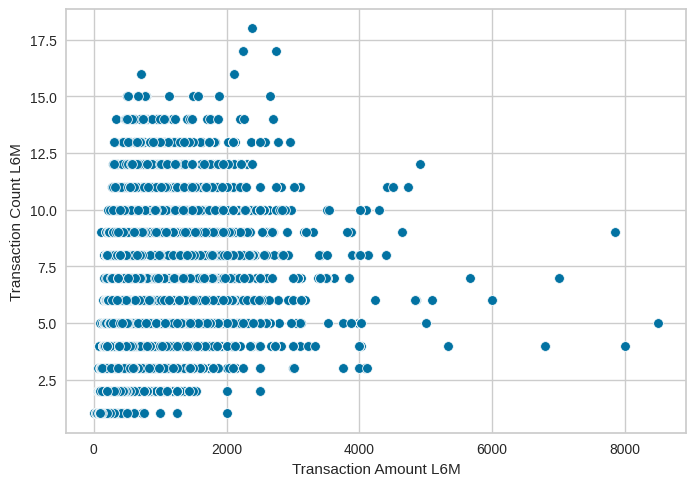

In [ ]:
# raw data without scaling
raw_scatter = sns.scatterplot(data = customer, x = 'TXN_AMT_L6M', y = 'TXN_CNT_L6M')
plt.xlabel('Transaction Amount L6M')
plt.ylabel('Transaction Count L6M')

In [ ]:
# we use RobustScaler because we have outliers in our data
scaler = RobustScaler()

# create new dataframe where we apply RobustScaler into our raw Data
robust_df = customer.copy()
robust_df[col_list] = scaler.fit_transform(robust_df[col_list])

# check the data
robust_df

,ACCOUNT_ID,TXN_CNT_L6M,TXN_AMT_L6M
0,100000004,0.333333,1.921742
1,100000008,-0.333333,0.009120
2,100000012,0.000000,1.842895
3,100000014,1.333333,4.289497
4,100000015,0.333333,0.185937
...,...,...,...
111128,101059832,-0.666667,-0.667255
111129,101059843,-0.333333,-0.196528
111130,101059857,1.000000,-0.166225
111131,101059860,-0.333333,0.465431


Text(0, 0.5, 'Transaction Count L6M')

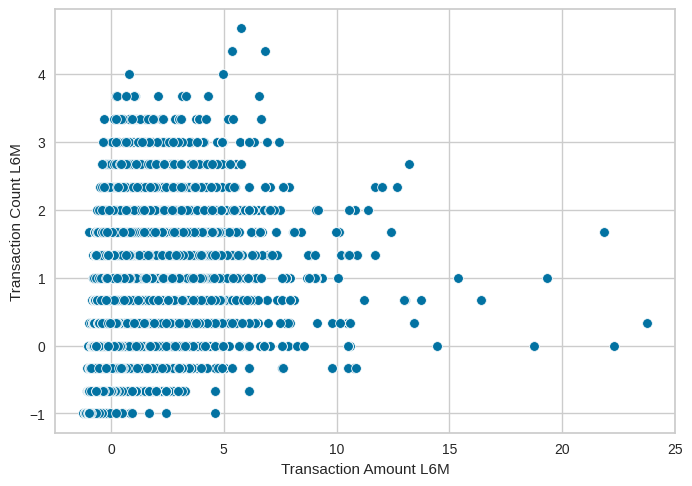

In [ ]:
# visualize scaled data
robust_scatter = sns.scatterplot(data = robust_df, x = 'TXN_AMT_L6M', y = 'TXN_CNT_L6M')
plt.xlabel('Transaction Amount L6M')
plt.ylabel('Transaction Count L6M')

### Clustering Process

####Elbow Method

In [ ]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++', n_init=10)
    kmeanModel.fit(customer[['TXN_AMT_L6M','TXN_CNT_L6M']]) # Ini yang diganti jadi df yang dipakai
    distortions.append(kmeanModel.inertia_)

distortions



[15637619925.652817,
 6938206479.638441,
 3957940012.915864,
 2623947411.180729,
 1762449035.342586,
 1272172703.0892267,
 966858595.828717,
 765153937.7006444,
 624841809.7167413,
 511686098.2087545,
 398579563.36334616,
 331168934.2724246,
 283627984.1643067,
 245656387.01645958,
 212581630.41465676]

<Figure size 1600x800 with 0 Axes>

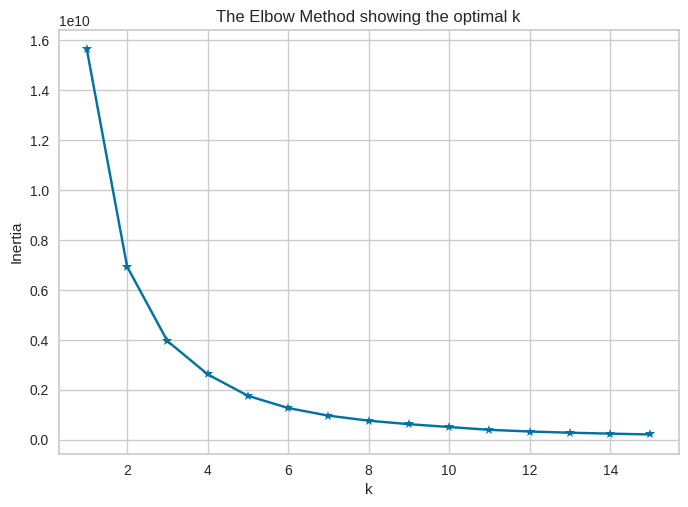

In [ ]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

####Silhouette Method

In [ ]:
#import silhouette
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.5762378186633272

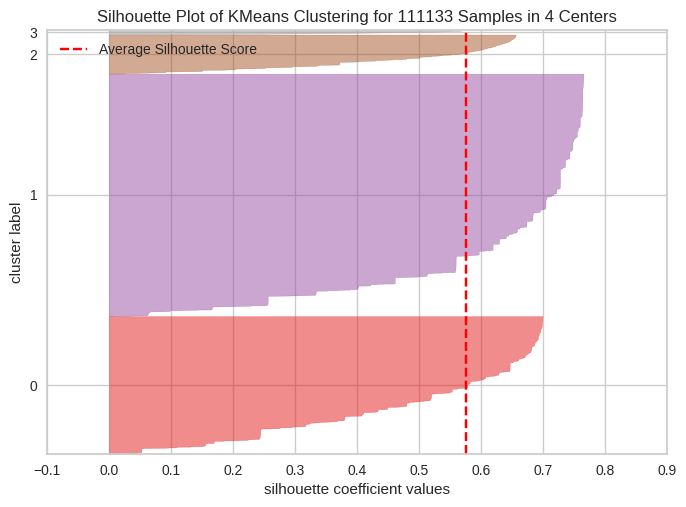

In [ ]:
# Untuk k=4 clusters
cluster_model = KMeans(n_clusters = 4, random_state = 42)
cluster_model.fit(customer[['TXN_AMT_L6M','TXN_CNT_L6M']])

sil = SilhouetteVisualizer(cluster_model, is_fitted = True)
sil.fit(customer[['TXN_AMT_L6M','TXN_CNT_L6M']])
sil.finalize()
sil.silhouette_score_

For k=2, the average silhouette score is 0.6767450002719647
For k=3, the average silhouette score is 0.6128238122501103
For k=4, the average silhouette score is 0.5756151661781306
For k=5, the average silhouette score is 0.5565437815692782
For k=6, the average silhouette score is 0.552634649200282
For k=7, the average silhouette score is 0.5399812682144985


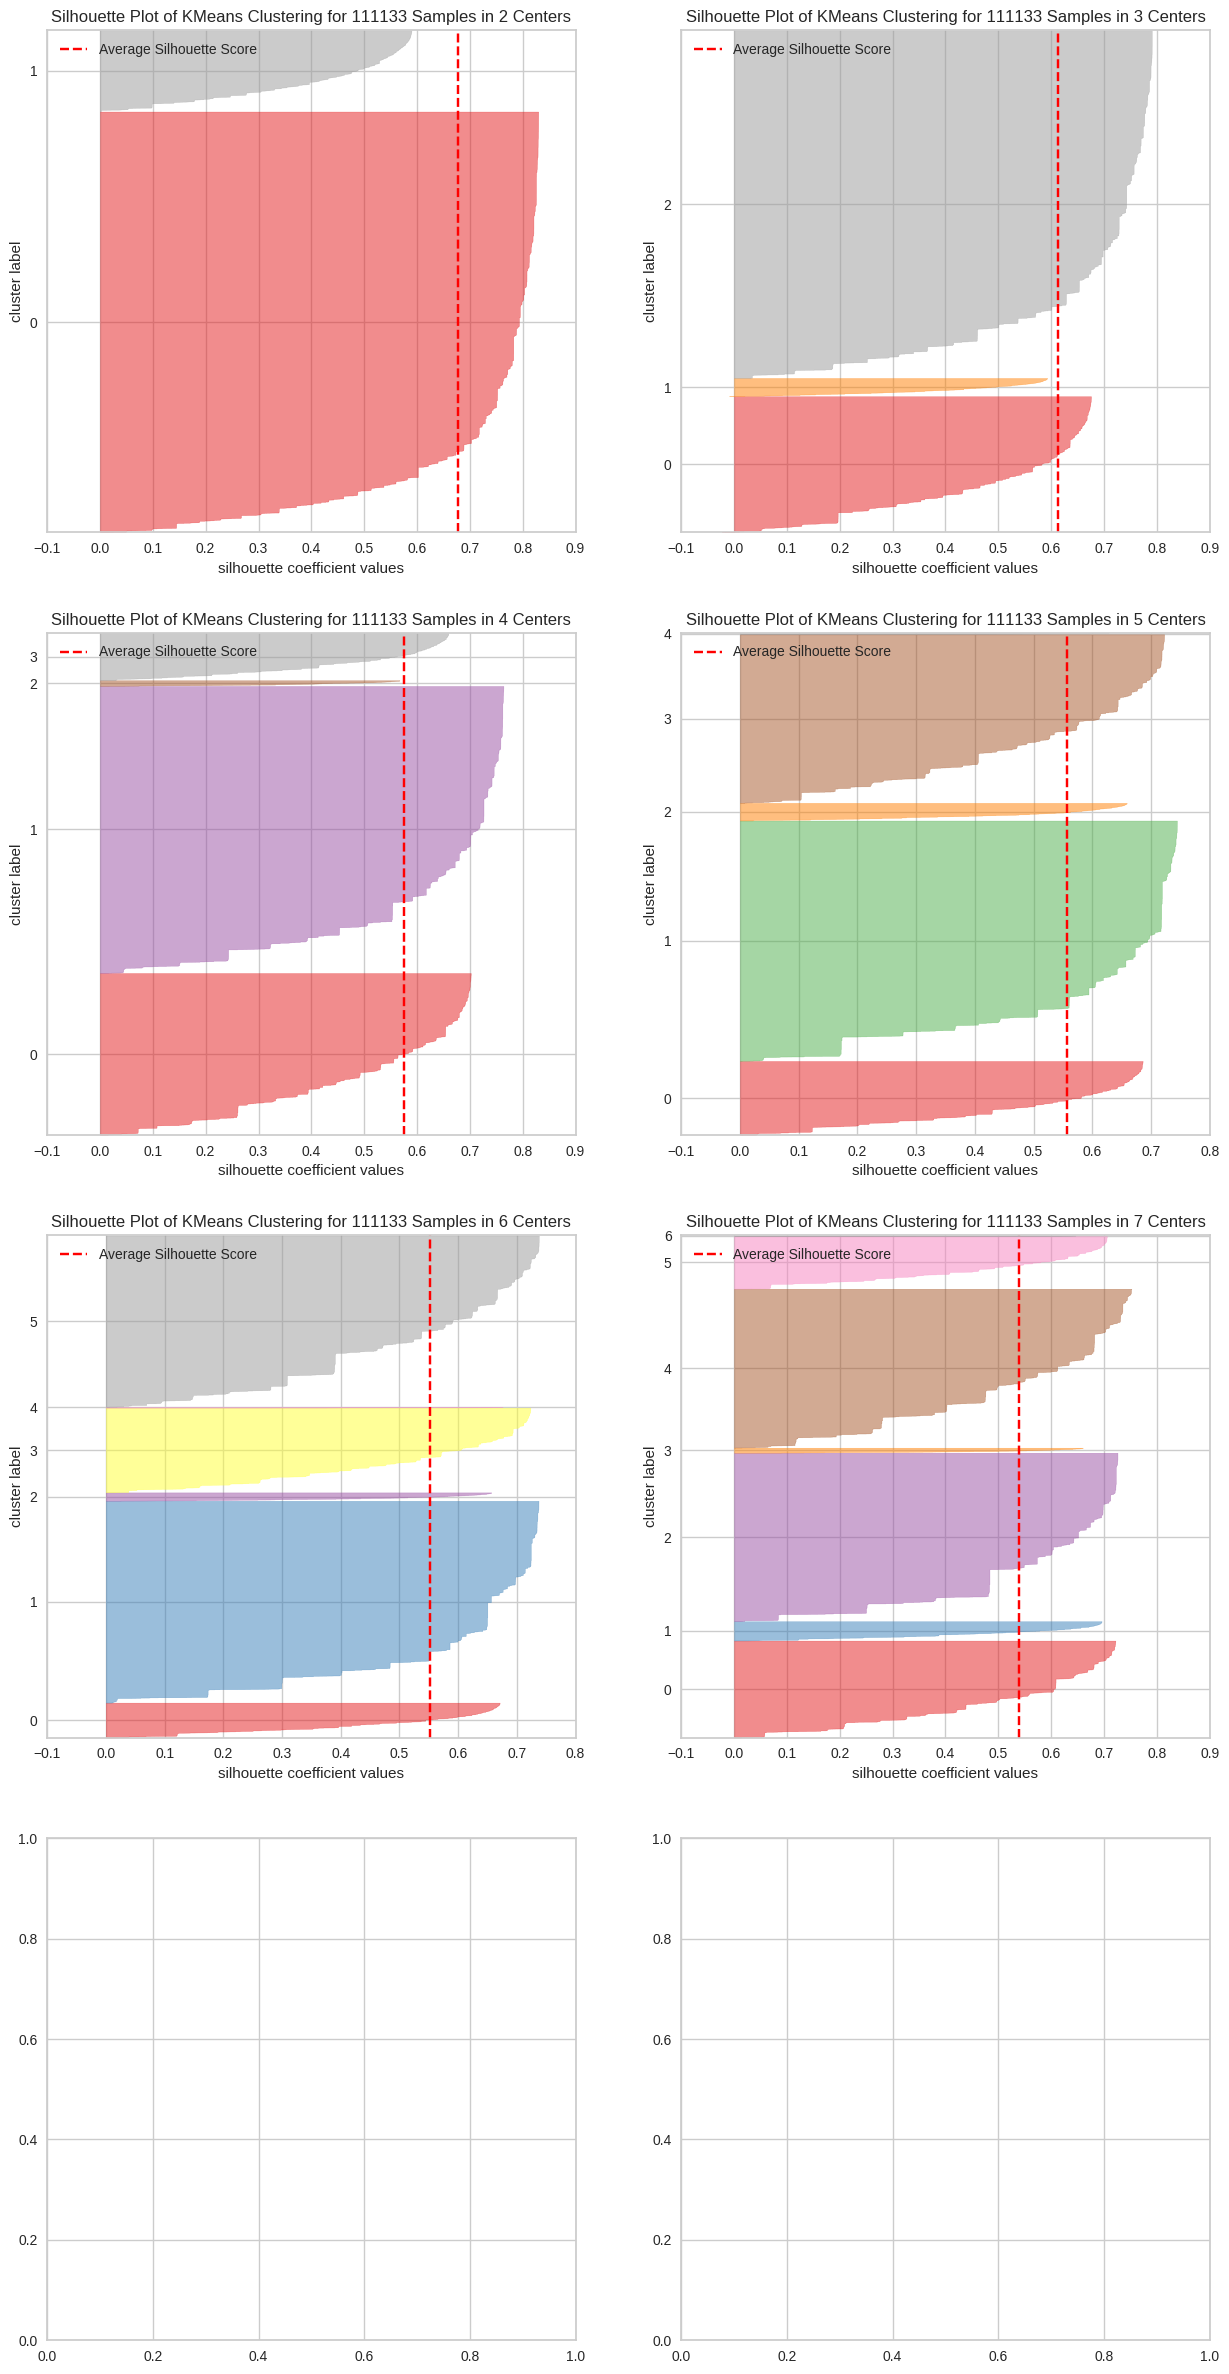

In [ ]:
# Silhouette score plot
K = range(2,8)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(customer[['TXN_AMT_L6M','TXN_CNT_L6M']])
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

The nearer silhouette_score to 1, the more optimal cluster number. Cluster number= 3 is the most optimal. From elbow method and silhoutte analysis, we can determine 3 cluster.

##Cluster Result

###K-Means Clustering

From K-Means and Silhoutte Scores we get that there are 3 clusters

In [ ]:
# Initialize KMeans for 3 clusters
cluster_result = customer.copy()
kmeans = KMeans(n_clusters=3)
kmeans.fit(customer[['TXN_AMT_L6M','TXN_CNT_L6M']])
cluster_labels = kmeans.labels_
cluster_result['cluster'] = cluster_labels

In [ ]:
cluster_result

,ACCOUNT_ID,TXN_CNT_L6M,TXN_AMT_L6M,cluster
0,100000004,5.0,1080.0,1
1,100000008,3.0,429.9,0
2,100000012,4.0,1053.2,1
3,100000014,8.0,1884.8,2
4,100000015,5.0,490.0,0
...,...,...,...,...
111128,101059832,2.0,200.0,0
111129,101059843,3.0,360.0,0
111130,101059857,7.0,370.3,0
111131,101059860,3.0,585.0,1


In [ ]:
cluster_result['cluster'].value_counts()

0    76230
1    30817
2     4086
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='TXN_AMT_L6M'>

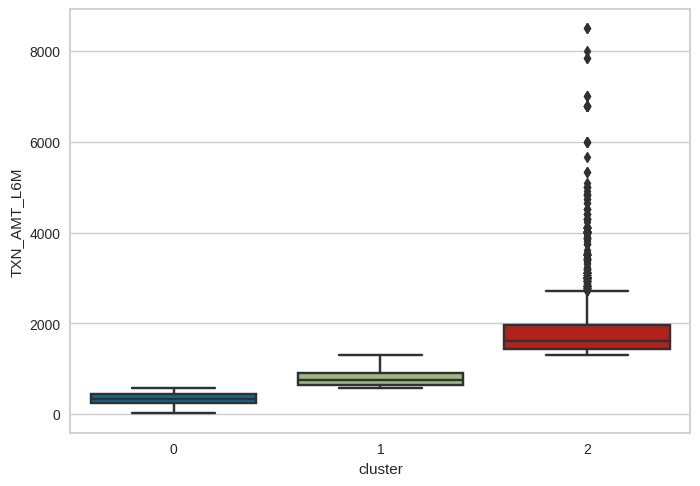

In [ ]:
sns.boxplot(data = cluster_result, x = 'cluster', y = 'TXN_AMT_L6M')

<Axes: xlabel='cluster', ylabel='TXN_CNT_L6M'>

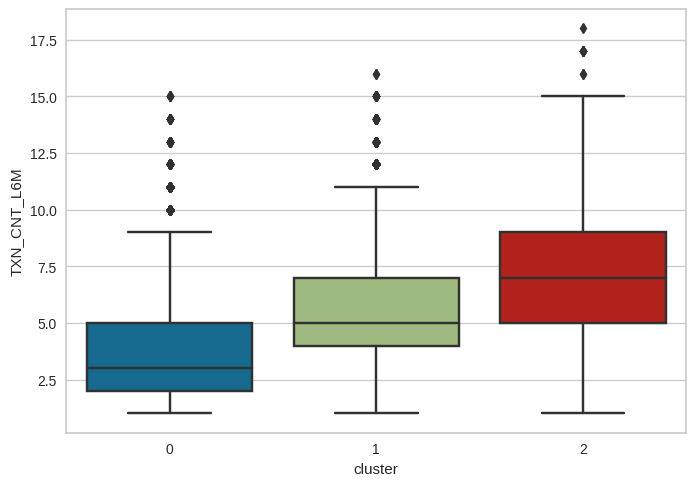

In [ ]:
sns.boxplot(data = cluster_result, x = 'cluster', y = 'TXN_CNT_L6M')

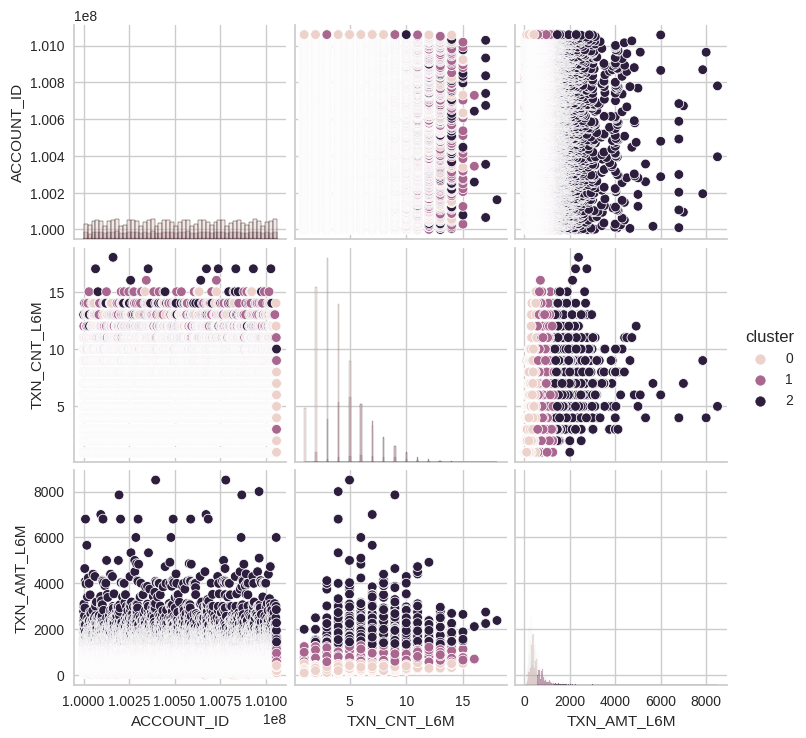

In [ ]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(cluster_result,hue='cluster', diag_kind="hist")

### Intrepreting cluster results

In [ ]:
# We also need to consider the size of each cluster
cluster_result.groupby('cluster').mean()[['TXN_AMT_L6M']].T

cluster,0,1,2
TXN_AMT_L6M,342.075208,797.231784,1819.178634


In [ ]:
# We also need to consider the size of each cluster
cluster_result.groupby('cluster').count()[['ACCOUNT_ID']].T

cluster,0,1,2
ACCOUNT_ID,76230,30817,4086


In [ ]:
# We Group the data to see unique user characteristics
customer_cluster = cluster_result.groupby('cluster').agg({
    'ACCOUNT_ID' : 'nunique',
    'TXN_AMT_L6M': 'sum',
    'TXN_CNT_L6M': 'sum',

}).reset_index()

customer_cluster

,cluster,ACCOUNT_ID,TXN_AMT_L6M,TXN_CNT_L6M
0,0,76230,26076393.1,293744.0
1,1,30817,24568291.9,175018.0
2,2,4086,7433163.9,28257.0


In [ ]:
cluster_descstat = pd.DataFrame(cluster_result.groupby(['cluster'])['TXN_AMT_L6M','TXN_CNT_L6M'].agg(['count','min','max','mean','median']))
cluster_descstat = round(cluster_descstat,3)
cluster_descstat

TXN_AMT_L6M                                   TXN_CNT_L6M             \
              count     min     max      mean  median       count  min   max   
cluster                                                                        
0             76230    10.0   568.0   342.075   340.0       76230  1.0  15.0   
1             30817   568.8  1300.2   797.232   750.0       30817  1.0  16.0   
2              4086  1303.2  8500.0  1819.179  1609.8        4086  1.0  18.0   

                       
          mean median  
cluster                
0        3.853    3.0  
1        5.679    5.0  
2        6.916    7.0

<Axes: xlabel='Transaction Amount L6M', ylabel='Transaction Count L6M'>

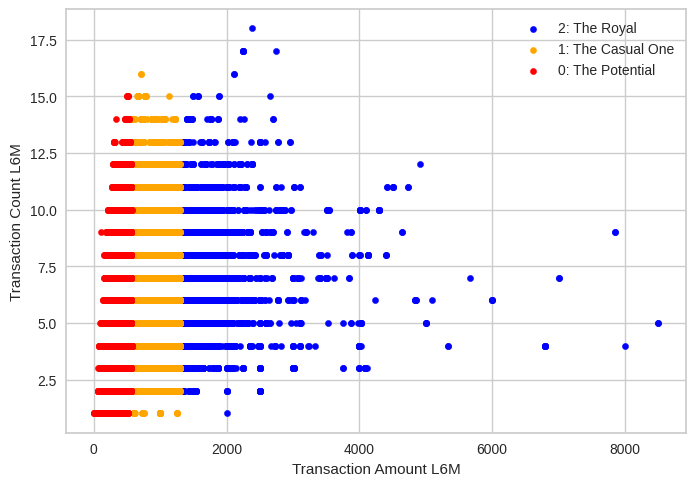

In [ ]:
ax = cluster_result[cluster_result['cluster'] == 2].plot.scatter(x='TXN_AMT_L6M', y='TXN_CNT_L6M', c='blue', label='2: The Royal')
ax = cluster_result[cluster_result['cluster'] == 1].plot.scatter(x='TXN_AMT_L6M', y='TXN_CNT_L6M', c='orange', label='1: The Casual One', ax=ax)
ax = cluster_result[cluster_result['cluster'] == 0].plot.scatter(x='TXN_AMT_L6M', y='TXN_CNT_L6M', c='red', label='0: The Potential', ax=ax)
plt.xlabel('Transaction Amount L6M')
plt.ylabel('Transaction Count L6M')
ax

In [ ]:
# Merge 'PROMO_SENSITIVE' column from df2 to cluster_result based on 'ACCOUNT_ID'
cluster_results = cluster_result.merge(df2[['ACCOUNT_ID', 'PROMO_SENSITIVE', 'AGE', 'FLAG_FEMALE']], on='ACCOUNT_ID', how='left')

# Print the updated cluster_results DataFrame with the 'PROMO_SENSITIVE' column added
print(cluster_results)


        ACCOUNT_ID  TXN_CNT_L6M  TXN_AMT_L6M  cluster  PROMO_SENSITIVE   AGE  \
0        100000004          5.0       1080.0        1                1  47.0   
1        100000008          3.0        429.9        0                1  31.0   
2        100000012          4.0       1053.2        1                1  53.0   
3        100000014          8.0       1884.8        2                1  39.0   
4        100000015          5.0        490.0        0                1  33.0   
...            ...          ...          ...      ...              ...   ...   
111128   101059832          2.0        200.0        0                1  44.0   
111129   101059843          3.0        360.0        0                1  30.0   
111130   101059857          7.0        370.3        0                1  43.0   
111131   101059860          3.0        585.0        1                1  36.0   
111132   101059866          5.0        420.0        0                1  41.0   

        FLAG_FEMALE  
0               1

In [ ]:
# We Group the data to see unique user characteristics
EDA_cluster = cluster_results.groupby('cluster').agg({
    'TXN_AMT_L6M': 'sum',
    'TXN_CNT_L6M': 'sum',
    'PROMO_SENSITIVE': 'sum',
    'AGE': 'mean',
    'FLAG_FEMALE': 'sum',
    'ACCOUNT_ID' : 'nunique'
}).reset_index()

# Calculate the percentage of female customers for each cluster
EDA_cluster['Percentage_Female'] = (EDA_cluster['FLAG_FEMALE'] / EDA_cluster['ACCOUNT_ID']) * 100
EDA_cluster['Percentage_Promo_Sensitive'] = (EDA_cluster['PROMO_SENSITIVE'] / EDA_cluster['ACCOUNT_ID']) * 100
EDA_cluster = EDA_cluster.drop(columns=['FLAG_FEMALE', 'ACCOUNT_ID', 'PROMO_SENSITIVE'])

EDA_cluster.columns = [ 'Cluster', 'Revenue_L6M', 'Trans_Count_L6M', 'Average_AGE', 'Percentage_Female', '%Promo_Sensitive' ]


# Print the EDA_cluster DataFrame with the percentage of female customers for each cluster
EDA_cluster

,Cluster,Revenue_L6M,Trans_Count_L6M,Average_AGE,Percentage_Female,%Promo_Sensitive
0,0,26076393.1,293744.0,40.507779,58.802309,98.292011
1,1,24568291.9,175018.0,40.508615,58.019924,98.562482
2,2,7433163.9,28257.0,40.617964,56.069506,97.993147


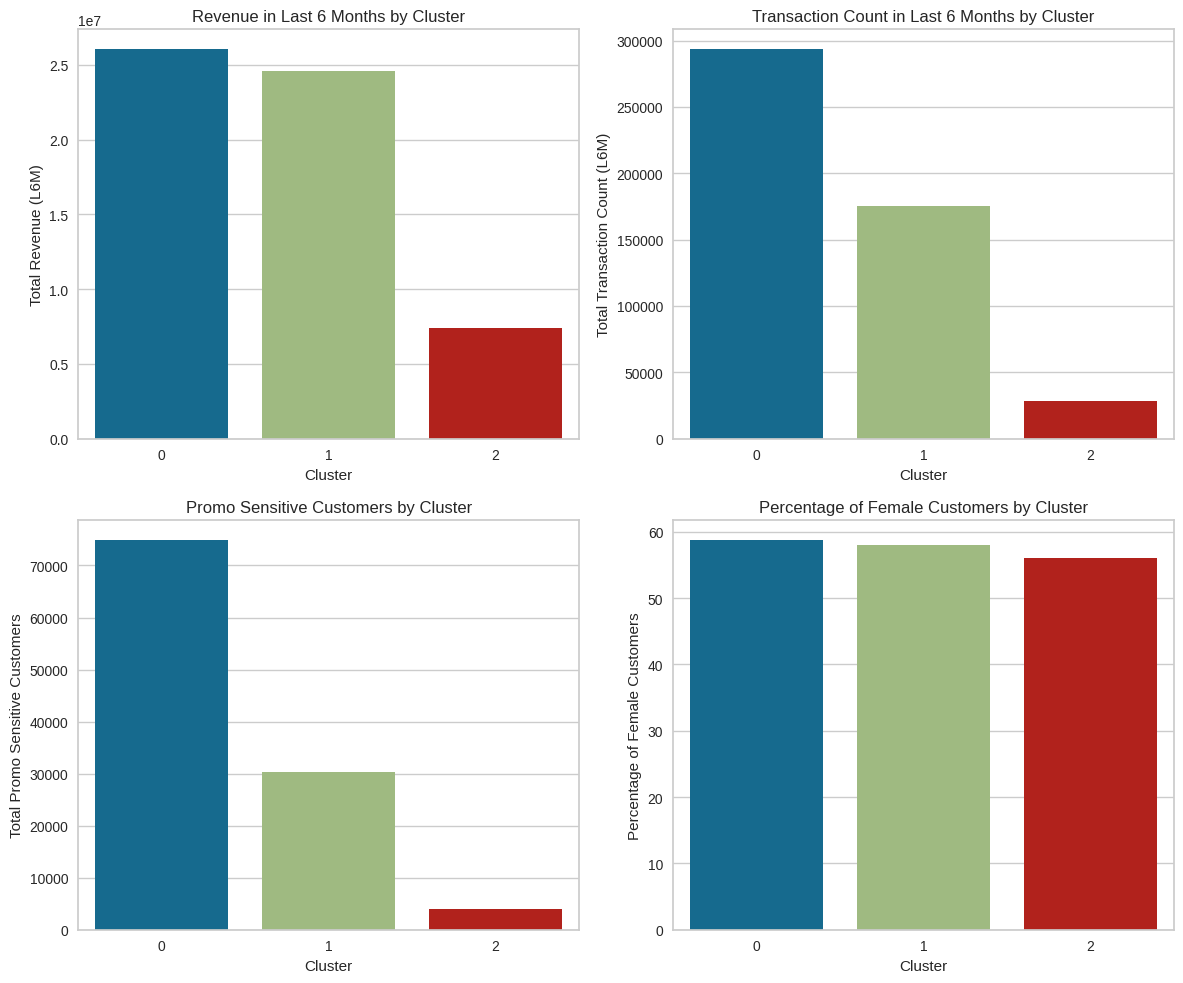

In [ ]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Bar plot for Revenue_L6M
sns.barplot(x='Cluster', y='Revenue_L6M', data=EDA_cluster, ax=axes[0, 0])
axes[0, 0].set_title('Revenue in Last 6 Months by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Total Revenue (L6M)')

# Bar plot for Trans_Count_L6M
sns.barplot(x='Cluster', y='Trans_Count_L6M', data=EDA_cluster, ax=axes[0, 1])
axes[0, 1].set_title('Transaction Count in Last 6 Months by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Total Transaction Count (L6M)')

# Bar plot for Promo_Sensitive
sns.barplot(x='Cluster', y='Promo_Sensitive', data=EDA_cluster, ax=axes[1, 0])
axes[1, 0].set_title('Promo Sensitive Customers by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Total Promo Sensitive Customers')

# Bar plot for Percentage_Female
sns.barplot(x='Cluster', y='Percentage_Female', data=EDA_cluster, ax=axes[1, 1])
axes[1, 1].set_title('Percentage of Female Customers by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Percentage of Female Customers')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


## Insight and Recommendation

**Insight**

Cluster 2: The Potential

This cluster represents customers with low spending and a high sensitivity to promotions.
These customers are not making significant transactions but are highly responsive to promotions.
They might be occasional or potential customers who need extra incentives or promotions to increase their spending.

Cluster 1: The Casual One

This cluster represents customers with moderate spending behavior.
These customers make average transactions without being too sensitive to promotions.
They are relatively stable customers who make regular purchases without the need for heavy promotions.

Cluster 0: The Royal

This cluster represents customers with high average spending.
These customers make significant transactions and are less sensitive to promotions.
They are the most valuable customers who consistently make high-value purchases, regardless of promotions.

**Recommendations:**

Cluster 2: The Potential

Focus on targeted promotions and offers to attract these potential customers and encourage them to make more purchases.
Implement strategies to increase engagement with this segment and convert them into more regular and loyal customers.

Cluster 1: The Casual One

Offer occasional promotions or rewards to maintain the loyalty of this segment and keep them engaged.
Identify opportunities to upsell or cross-sell products and services to increase their transaction amounts.

Cluster 0: The Royal

Provide personalized and exclusive offers to reward and retain these valuable customers.
Strengthen customer loyalty programs to keep them engaged and satisfied with their purchases.